In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
column_names = ['ID', 'Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
                'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
                'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df = pd.read_csv('/content/breast-cancer-wisconsin.data', names=column_names)

# Replace missing values
df['Bare_Nuclei'].replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

# Convert types
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype(int)

# Drop ID column
df.drop('ID', axis=1, inplace=True)

# Features and target
X = df.drop('Class', axis=1)
y = df['Class'].map({2: 0, 4: 1})  # 0: Benign, 1: Malignant


/tmp/ipython-input-1-642900813.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bare_Nuclei'].replace('?', pd.NA, inplace=True)


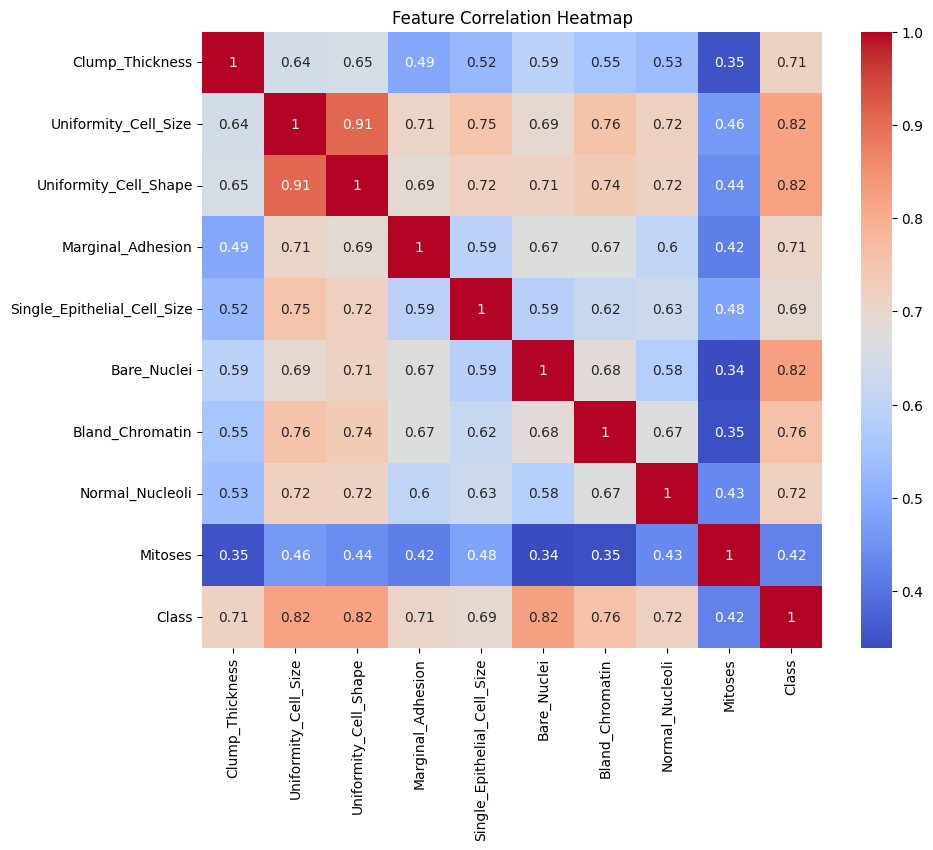

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)


SVC(kernel='linear', random_state=42)

Accuracy: 0.9708029197080292
Precision: 0.9821428571428571
Recall: 0.9482758620689655

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        79
           1       0.98      0.95      0.96        58

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



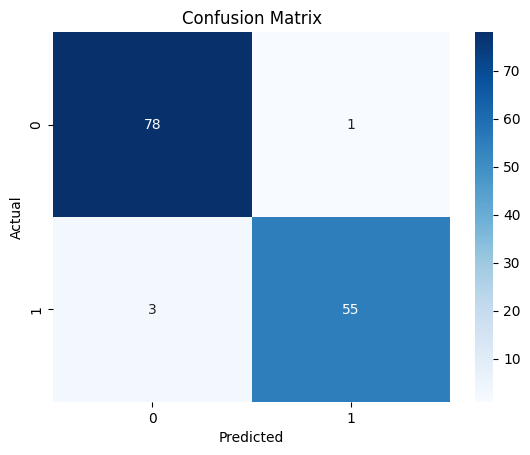

In [ ]:
# Predict and evaluate
y_pred = svm_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# **SVM vs Random Forest Comparison**

🔍 Random Forest Results
Accuracy: 0.9562043795620438
Precision: 0.9814814814814815
Recall: 0.9137931034482759

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96        79
           1       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



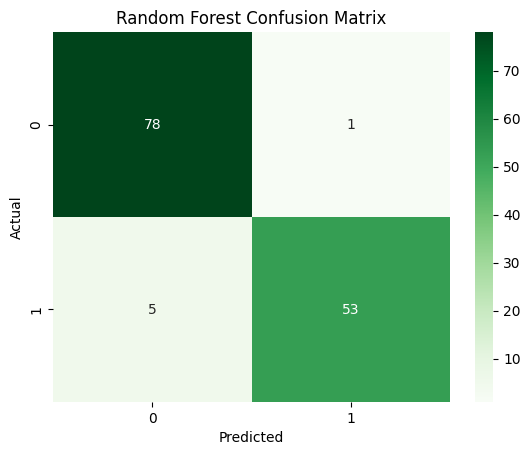

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation
print("🔍 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


# **GridSearchCV for SVM & Random Forest**

# 1. Grid Search for SVM

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define SVM hyperparameter grid
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Grid search for SVM
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train_scaled, y_train)

print("🔧 Best SVM Parameters:", svm_grid.best_params_)
print("✅ Best SVM CV Accuracy:", svm_grid.best_score_)

# Evaluate on test set
svm_best_model = svm_grid.best_estimator_
y_pred_svm_best = svm_best_model.predict(X_test_scaled)

print("\n📊 Tuned SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_best))
print("Precision:", precision_score(y_test, y_pred_svm_best))
print("Recall:", recall_score(y_test, y_pred_svm_best))


🔧 Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
✅ Best SVM CV Accuracy: 0.9670391993327774

📊 Tuned SVM Performance:
Accuracy: 0.9635036496350365
Precision: 0.9818181818181818
Recall: 0.9310344827586207


# 2. Grid Search for Random Forest

In [ ]:
# Define RF hyperparameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid search for Random Forest
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)

print("\n🔧 Best RF Parameters:", rf_grid.best_params_)
print("✅ Best RF CV Accuracy:", rf_grid.best_score_)

# Evaluate on test set
rf_best_model = rf_grid.best_estimator_
y_pred_rf_best = rf_best_model.predict(X_test_scaled)

print("\n📊 Tuned RF Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("Precision:", precision_score(y_test, y_pred_rf_best))
print("Recall:", recall_score(y_test, y_pred_rf_best))



🔧 Best RF Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
✅ Best RF CV Accuracy: 0.9651876563803171

📊 Tuned RF Performance:
Accuracy: 0.9562043795620438
Precision: 0.9814814814814815
Recall: 0.9137931034482759
